# Einleitung: Kookurrenzen

Gegenstand dieses Notebooks ist die Berechnung von Kookurrenzen von Wörtern in einem Text. Mit Kookurrenz ist dabei gemeint, dass zwei Wörter im Text gemeinsam vorkommen. 

Dabei muss insbesondere festgelegt werden, wie groß der Abstand zwischen den beiden Wörtern sein darf, damit sie als gemeinsam vorkommend gelten. Dieser Abstand wird als das 'windowsize' bezeichnet. 

Außerdem können eine Reihe von Werten berechnet werden, um die Kookurrenz zu beschreiben. Zunächst einmal ist das die jeweilige Häufigkeit der beiden beteiligten Wörter im Text. Dann die Häufigkeit der Kookurrenz der beiden Wörter, also wie oft die im definierten Abstand gemeinsam auftreten. Auf dieser Grundlage lässt sich zudem mit unterschiedlichen Maßen ermitteln, wie unerwartet und damit potentiell bedeutungsvoll diese Kookurrenz ist. All diese Punkte werden im folgenden weiter erläutert und illustriert. 

Konstrukte, die Sie für das Verständnis dieser Lesson schon kennen sollten, sind `with open()` zum Öffnen von Dateien und `re.split()` für das Trennen eines Strings in eine Liste. 

In dieser Übung neue Konstrukte sind `list comprehension` und `.enumerate()`. 

# Vergleich mit der Kookurrenz-Analyse in einem Tool

Bevor wir beginnen der Hinweis, dass es für die Kookurrenz-Analyse natürlich auch Tools gibt. Es kann interessant sein, die selbst berechneten Ergebnisse mit denen eines solchen Tools zu vergleichen. Als Beispiel sei hier TXM genannt. Die Abfrage, die wir im Folgenden unter anderem verwenden werden, ist die der Kookurrenz der Wörter 'Neptune' und 'père' bzw. 'chère' im Text FRA01402_Fleuriot aus ELTeC-fra. Hier die Ergebnise in TXM: 

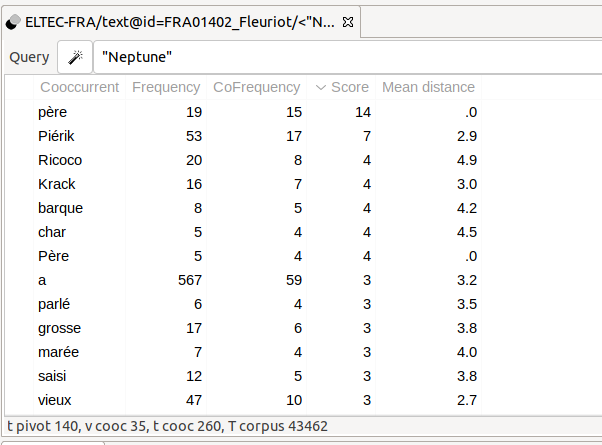

# Vorbereitung 1: Kookurrenz

Zunächst mal etwas Einleitendes zum Thema Kookurrenz. Angenommen, wir haben den folgenden Text, in dem jedes `x` ein Wort ist. Der Text umfassst 30 Wörter in 3 Zeilen. 
```
xxxxxxxxxx
xxxxxxxxxx
xxxxxxxxxx
```

Jetzt nehmen wir außerdem an, dass die beiden Wörter, deren Kookurrenz uns im Moment interessiert, `A` und `B` lauten. Beide kommen mehrfach im Text vor. 
```
xAxxBxxxxx
xxxAxBxxxx
AxxxxxxxAx
```

Jetzt müssen wir noch die 'Fenstergröße' festlegen, innerhalb derer ein gemeinsames Vorkommen als 'Kookurrenz' gilt. Wir wählen für das kompakte Beispiel eine Fenstergröße von 3, in realen Kontexten typisch sind eher Werte zwischen 3 und 10, je nach Anwendungskontext. 

Dieses Fenster 'läuft' jetzt sozusagen über den Text und es wird in jeder Position geprüft, ob beide Wörter innerhalb des Fensters liegen. Wenn ja, wird ein Zähler erhöht. 

Schritt 1: nein
```
[xAx]xBxxxxx
xxxAxBxxxx
AxxxxxxxAx
```
Schritt 2: nein (nur A)
```
x[Axx]Bxxxxx
xxxAxBxxxx
AxxxxxxxAx
```
Schritt 3 nein (jetzt nur B): 
```
xA[xxB]xxxxx
xxxAxBxxxx
AxxxxxxxAx
```
Schritt n: ja! 
```
xAxxBxxxxx
xxx[AxB]xxxx
AxxxxxxAx
```

Andere Ansätze dafür, die Kookurrenz zu bestimmen, sind natürlich auch denkbar. Beispielsweise könnte man auch erst ein Wort suchen und dann im umliegenden Textfenster prüfen, ob auch das andere Wort dort vorkommt. 

# Vorbereitung 2: Kookurrenz-Score

Im Screenshot oben hatten wir gesehen, dass das Tool auch einen "Score" ausgibt. Dieser Score drückt aus, wie überraschend die Anzahl der Kookurrenzen der beiden Wörter ist, wenn man ihre separate Häufigkeit im Text kennt.

Intuitiv leuchtet ein: Wenn beide Wörter im Text sehr häufig sind, kann es natürlich auch gut sein, dass sie öfter gemeinsam auftreten. Wenn beide Wörter selten sind, werden sie wohl auch seltener gemeinsam auftreten. Besonders interessant ist für uns aber der Fall, wo eines der beiden oder auch beide Wörter an sich gar nicht so häufig sind, aber dennoch häufig gemeinsam auftreten. Dafür muss es dann einen anderen Grund als die reine Sprachstatistik geben.

Die Überlegung ist im Einzelnen folgende: Jedes Wort hat eine Häufigkeit im Text, die man auch als Wahrscheinlichkeit verstehen kann, dass man auf das Wort trifft, wenn man zufällig ein Wort im Text auswählt. Diese Wahrscheinlichkeit `p(1)` entspricht der relativen Häufigkeit des Wortes, also Häufigkeit / Textlänge in Wörtern. Diese Wahrscheinlichkeit bestimmt man für beide untersuchten Wörter. 

Außerdem kann man jetzt berechnen, wie wahrscheinlich es ist, dass die beiden Wörter gemeinsam auftreten, wenn ihr Auftreten unabhängig voneinander ist. Das entspricht ihrer gemeinsamen Wahrscheinlichkeit, also `p(1) x p(2)`. Sie drückt also gewissermaßen die Erwartung an die Kookurrenz aus. 

Jetzt müssen wir noch die tatsächliche, also empirisch bestimmte Häufigkeit bestimmen, mit der die Kookurrenz im Text auftritt und sie als Wahrscheinlichkeit ausdrücken. Wir können sie als Kookurrenz / Textlänge in Wörtern ausdrücken und `p(1,2)` nennen. 

Je deutlicher die empirische Häufigkeit `p(1,2)` der Kookurrenz die erwartete Wahrscheinlichkeit `p(1) x p(2)` übertrifft, desto signifikanter ist die Kookurrenz. 

In einem spezifischen Maß für diesen Kookurrenz-Score, der "Pointwise Mutual Information" (PMI; [Wikipedia)](https://en.wikipedia.org/wiki/Pointwise_mutual_information) genannt wird, sind diese Überlegungen eingegangen. Hier wird der Score als der Logarithmus der Division von beobachteter zu erwarteter Kookurrenz bestimmt:
```
PMI = log(p(1,2)/(p(1) x p(2)))
```

# Vorbereitung 3: list comprehension

Für die vorliegende Aufgabe nicht essentiell, aber doch hier und in vielen anderen Fällen nützlich sind `list comprehensions`. 

Mit dem Konstrukt `list comprehension` können Listen bearbeitet und erstellt werden. Das Konstrukt nutzt dabei die Logik der for-Schleife, aber in einer kompakten Notation. 

Eine gute Einführung in `list comprehensions` finden Sie beispielsweise im Kapitel 31 des Python-Buchs von Klein. 

Die Syntax der `list comprehension` besteht erst einmal darin, dass sie von eckigen Klammern umgeben ist (wie eine Liste!). 

Innerhalb dieser Klammern kann jetzt mit `for` und `if` beispielsweise eine Liste in eine andere Liste verwandelt werden: 

In [1]:
zahlen = [2,3,4,5,6]
quadrate = [i**2 for i in zahlen]
print(quadrate)


[4, 9, 16, 25, 36]


Dies kann auch durch eine Bedingung gesteuert werden:

In [5]:
zahlen = [2,3,4,5,6]
quadrate = [i for i in zahlen if i**2 > 20]
print(quadrate)


[5, 6]


Auf Texte bezogen kann so auch ein Text beispielsweise mit Stoppwörtern gefiltert werden. 

Bitte hierbei beachten, dass im Beispiel das Wort für die Prüfung gegen die Stopwörter in `lowercase` gewandelt wurde, aber das unveränderte Wort weitergegeben wird. 

Man beachte außerdem, dass die Stopliste auch einen leeren Eintrag enthält (`""`). Dieser sorgt dafür, dass leere Tokens, die durch das Splitten mit dem regulären Ausdruck entstehen können, entfernt werden. 

In [7]:
import re 
text_str = "Ach wie schön ist Panama."
text_list = re.split("\W+", text_str)
print("text_list:", text_list)

stopwords = ["der", "die", "das", "ach", "wie", "ist", ""]

text_filtered = [word for word in text_list if word.lower() not in stopwords]
print("text_filtered:", text_filtered)


text_list: ['Ach', 'wie', 'schön', 'ist', 'Panama', '']
text_filtered: ['schön', 'Panama']


# Vorbereitung 4: enumerate()

Eventuell auch nützlich: Die Funktion `enumerate()`.

Die Funktion `enumerate()`, die in Python verfügbar ist, unterscheidet sich von einer einfachen List, einem String oder einem anderen 'Iterable' dadurch, dass sie nicht nur die Items nacheinander ausgibt, sondern jeweils ein Tupel mit dem Index (oder Zähler / Position) und dem Wert des Items. Das kann man sich in verschiedenen Kontexten zu Nutze machen. 

Den Loop über eine normale Liste kennen Sie ja schon: 

In [2]:
composers = ["Mozart", "Bach", "Schönberg", "McCartney"]

for composer in composers:
    print(composer)

Mozart
Bach
Schönberg
McCartney


Verwendet man `enumerate()`, bekommt man jeweils den Index und den Wert als ein Tupel zurück: 

In [9]:
for composer in enumerate(composers):
    print(composer)

(0, 'Mozart')
(1, 'Bach')
(2, 'Schönberg')
(3, 'McCartney')


Und verwendet man nicht eine Ausgabevariable, sondern zwei, bekommt man die Bestandteile des Tupels auch separat zurück: 

In [10]:
for index,composer in enumerate(composers):
    print(index,composer)

0 Mozart
1 Bach
2 Schönberg
3 McCartney


Schließlich lässt sich das Konstrukt selbstverständlich auch mit einer `list comprehension` verbinden. Rückgabe ist eine Liste von Tuples.

In [11]:
filtered = [item for item in enumerate(composers)]
print(filtered)

[(0, 'Mozart'), (1, 'Bach'), (2, 'Schönberg'), (3, 'McCartney')]


Dabei kann man auch speziell auf Index oder Wert aus sein: 

In [12]:
# Nur Indices
index_filtered = [index for index,composer in enumerate(composers)]
print("index_filtered:", index_filtered)

# Nur Werte
composers_filtered = [composer for index,composer in enumerate(composers)]
print("composers_filtered:", composers_filtered)

index_filtered: [0, 1, 2, 3]
composers_filtered: ['Mozart', 'Bach', 'Schönberg', 'McCartney']


Schließlich kann man, wie in `list comprehensions` üblich, auch eine Bedingung formulieren: 

In [13]:
# Nur die Werte
filtered = [composer for index,composer in enumerate(composers) if len(composer) > 6]
print("filtered:", filtered)

filtered: ['Schönberg', 'McCartney']


Die Tupels sind übrigens auch mit Slicing ansprechbar. Hier wird also mit `item[1]` zunächst im Tupel der Wert angesprochen. Da dieser ein String ist, kann der erste Buchstaben im Wert mit `item[1][0]` angesprochen werden und hierfür eine Bedingung formuliert werden. 

In [1]:
# Beides als Tuple
filtered = [i for i,v in enumerate(composers) if v[0] == "M"]
print("filtered:", filtered)

NameError: name 'composers' is not defined

# Importe

Jetzt kann es losgehen! Bitte die Import ausführen und sicherstellen, dass die Pakete verfügbar sind. 

In [ ]:
from os.path import join
import numpy as np
import re

# Pfade

In [ ]:
textfilename = join("..", "data", "FRA01402_Fleuriot.txt")

Für Fortgeschrittene: Selbstverständlich könnten Sie an dieser Stelle auch eine andere Textdatei verwenden, die ebenfalls im Ordner `data` liegt oder die an anderer Stelle auf Ihrem Rechner verfügbar ist. Versuchen Sie es aus! 

# Daten laden

In [ ]:
def read_textfile(textfilename):
    with open(textfilename, "r", encoding="utf8") as infile: 
        text = infile.read().lower()
        text = re.split("\W+", text)
        text = [w for w in text if w]
    return text

text = read_textfile(textfilename)
print(text[0:10])
    

Wir lesen in Zeile 3 den Text als String ein und transformieren mit der Methode `.lower()` den Text in Kleinbuchstaben.

In Zeile 4 wird mit einem regulären Ausdruck (`\W+` = eines oder mehrere Nicht-Wort-Zeichen) der Text in eine Liste von Wörtern umgewandelt.

In Zeile 5 werden mit einer `list comprehension` (siehe unten) alle Einträge in der Liste gelöscht, die kein Wort enthalten. Gerne mal die durch Einfügen einer enstprechenden Zeile die Länge der Liste ermitteln und prüfen, wie groß der Unterschied ist, wenn man die Zeile 5 auskommentiert. 

Insgesamt ist die obige Zelle eine vollständige eigene Funktion, die dann gleich anschließend aufgerufen wird. Dabei geht es darum, auch in der Umgebung eines Jupyter Notebooks eine funktionale Programmierweise einzuüben. Es kann am Ende auch eine `main` Funktion eingerichtet werden, die dann die lokalen Funktionsaufrufe ersetzt. 

# Häufigkeit eines Wortes ermitteln

Jetzt können wir unsere Aufgabe, die Kookurrenz von zwei Wörtern in einem Text zu ermitteln, weiter verfolgen. 

Wir berechnen dafür zunächst die Häufigkeit der beiden Zielwörter im Text. (Nur wenn beide überhaupt vorkommen, lässt sich ihre Kookurrenz berechnen. Außerdem benötigen wir die Häufigkeit später, um zu berechnen, wie überraschend die Kookurrenz ist, wenn man die separate Häufigkeit der Wörter bedenkt. 

In [ ]:
word1 = "neptune"
word2 = "père"

def get_frequency(text, word):
    freq = text.count(word)
    if freq == 0:
        print("Warnung: Das gesuchte Wort", word, "kommt nicht vor.")
    return freq

freq1 = get_frequency(text, word1)
freq2 = get_frequency(text, word2)

print(word1, freq1, "|", word2, freq2)

Für die Ermittlung der Häufigkeit von zwei festgelegten Wörtern im Text wird in Zeile 2 die Methode des Datentyps `str` mit Namen `.count()` verwendet. 

Die Funktion wird zweimal aufgerufen, weil wir ja die Häufigkeit von zwei Wörtern ermitteln wollen. 

In [ ]:
def get_cooccurrences(text, word1, word2, windowsize):
    # Liste der Positionen im Text, an denen word1 vorkommt
    positions_word1 = [pos for pos,word in enumerate(text) if word == word1]
    # Wie oft kommt word2 im Fenster um word1 herum vor?
    coocs = 0
    for pos in positions_word1:
        textwindow = text[pos-(int(windowsize/2)):pos+(int(windowsize/2))+1] 
        [coocs:=coocs+1 for pos,word in enumerate(textwindow) if word == word2]
    if coocs == 0: 
        print("Es gibt keine Kookurrenz von", word1, "und", word2, ".")
    return coocs

# Parameter
windowsize = 10

# Funktionsaufruf
coocs = get_cooccurrences(text, word1, word2, windowsize)

# Ausgabe des Ergebnisses
print(word1, freq1, "|", word2, freq2, "| coocs", coocs)

Grundüberlegung für das Ermitteln der Kookurrenzen von zwei Wörtern: Wir finden die Positionen in der Liste mit dem Text, an denen das Wort1 vorkommt. Anschließend prüfen wir, ob in einem Fenster um jede dieser Positionen herum auch das Wort2 vorkommt. Wenn ja, findet eine Kookurrenz statt: dann wird der Zähler `coocs` um 1 hochgesetzt. 

Man beachte hier den erneuten Einsatz von `list comprehensions` (Erklärung siehe oben) und den Einsatz der Funktion `enumerate()`, mit dem eine Liste als Iterator mit Index und Wert eingesetzt wird. Die Funktion `enumerate()` wird unten erläutert. 

Alternativ wäre die ganze Funktion auch mit einer größeren Zahl an `for`-Schleifen und einem Zähler umsetzbar. 

Frage für Fortgeschrittene: Wie könnte man die Performance dieser Funktion optimieren, wenn man annimmt, dass die beiden Wörter, deren Kookurrenz man sucht, nicht gleich häufig im Text vorkommen?

# Berechnung eines Kookurrenz-Scores

Jetzt müssen wir nur noch einen Kookurrenz-Score berechnen. Dieser soll ausdrücken, wie unerwartet die Anzahl der Kookurrenzen ist, wenn man bedenkt, wie häufig die beiden Wörter separat sind. 

Wir berechnen hier die sogenannte 'Pointwise Mutual Information' (PMI), siehe die Überlegungen oben.

In [ ]:
def calculate_coocscore(text, freq1, freq2, coocs):
    if coocs != 0: 
        relfreq1 = freq1/len(text)
        relfreq2 = freq2/len(text)
        relcooc = coocs/len(text)
        PMI = np.log(relcooc/(relfreq1*relfreq2))
        return np.round(PMI,2)

score = calculate_coocscore(text, freq1, freq2, coocs)
print("score:", score)

# Abschluss: Alles gemeinsam aufrufen

Sie können an dieser Stelle nun die `main()`-Funktion verwenden, um alle Funktionen gemeinsam abzurufen. Dabei können Sie auch eigene Parameter definieren für die Wörter und das Windowsize. 

In [ ]:
textfilename = join("..", "data", "Copperfield-1.txt")
word1 = "black"
word2 = "eyes"
windowsize = 10

def main(textfilename):
    text = read_textfile(textfilename)
    freq1 = get_frequency(text, word1)
    freq2 = get_frequency(text, word2)
    coocs = get_cooccurrences(text, word1, word2, windowsize)
    score = calculate_coocscore(text, freq1, freq2, coocs)
    
    print("Ergebnisse für den Vergleich von:", word1, "und", word2)
    print(word1, freq1, "|", word2, freq2, "| coocs", coocs, "|score", score)

main(textfilename)

Ein paar mögliche Abfragen: 

1. In "Münchhausen.txt": teufel, seele
1. In "Copperfield-1.txt": black, eyes

Damit haben wir das Ende dieser Lesson erreicht.